In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
parkinsons_data = pd.read_csv("datasets/parkinsons.csv")

In [4]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
FEATURES = [feat for feat in parkinsons_data.columns if feat != "status"]

In [6]:
FEATURES

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [7]:
print("Shape of Dataset :: ", parkinsons_data.shape)
print("\nRatio Distribution :: \n", parkinsons_data["status"].value_counts())

Shape of Dataset ::  (200, 24)

Ratio Distribution :: 
 status
1    147
0     53
Name: count, dtype: int64


In [8]:
df_1s = parkinsons_data[parkinsons_data["status"] == 1].copy()
df_0s = parkinsons_data[parkinsons_data["status"] == 0].copy()
df_0s["status"].value_counts(), df_1s["status"].value_counts()

(status
 0    53
 Name: count, dtype: int64,
 status
 1    147
 Name: count, dtype: int64)

[Text(0.5, 0, 'Status :: (1 = True), (0 = False)'), Text(0, 0.5, 'Count')]

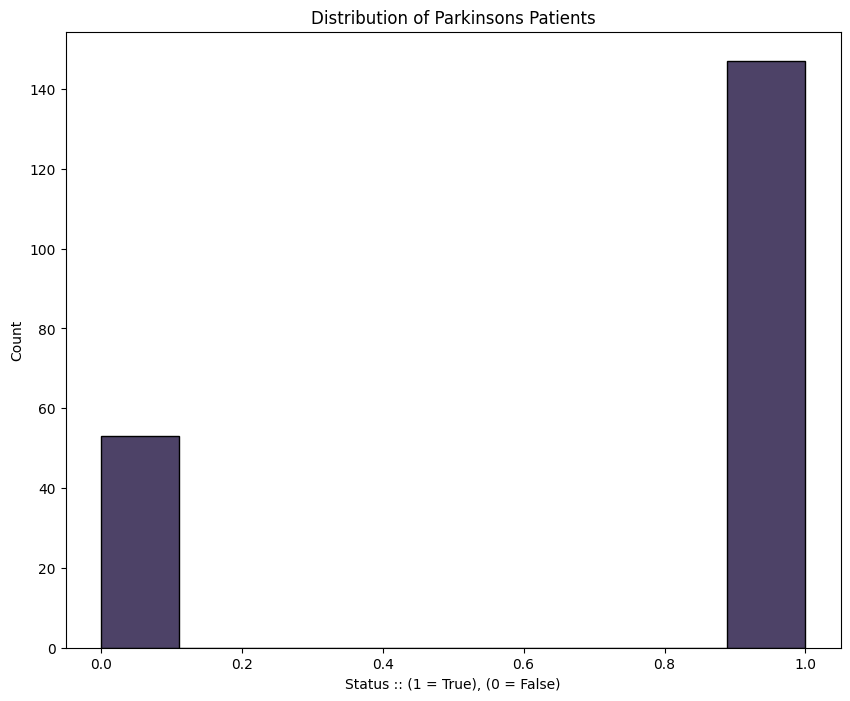

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
figure = sns.histplot(data=parkinsons_data, x="status", color="#110234", ax=ax)
figure.set_title("Distribution of Parkinsons Patients")
figure.set(xlabel="Status :: (1 = True), (0 = False)", ylabel="Count", )

In [10]:
X = parkinsons_data.drop(columns=["name", "status"], axis=1)
y = parkinsons_data["status"]

<Axes: title={'center': 'Correlation Matrix'}>

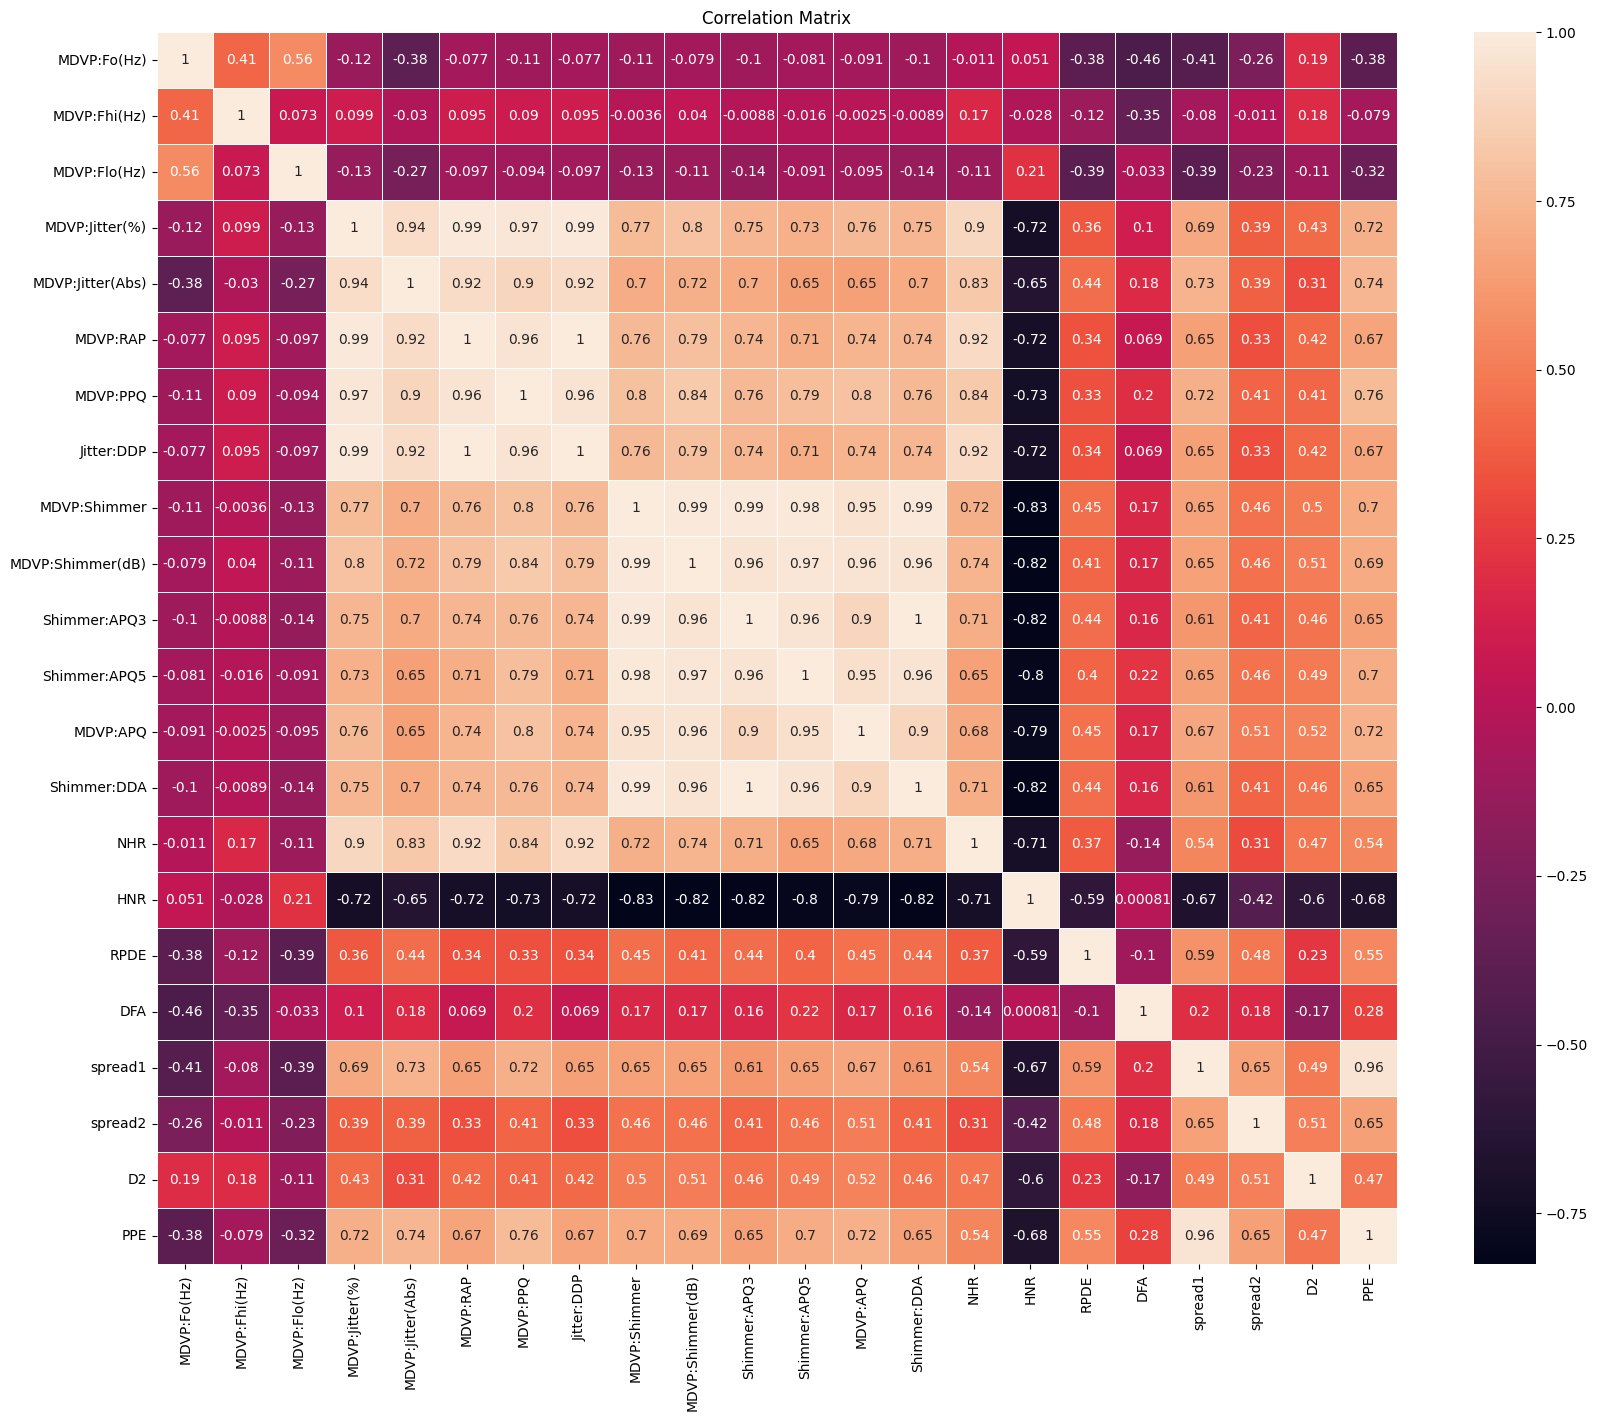

In [11]:
correlation_matrix = X.corr()
f, ax = plt.subplots(figsize=(20, 16))
figure2 = sns.heatmap(correlation_matrix, annot=True, fmt=".2g", linewidths=0.5, ax=ax)
figure2.set(title="Correlation Matrix")
figure2

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(200, 22) (160, 22) (40, 22)


In [13]:
scaler = StandardScaler()  # std_val = (sample - mean) / std
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = svm.SVC(kernel="linear")
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [16]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [17]:
print("Accuracy score of training data : ", training_data_accuracy)

Accuracy score of training data :  0.91875


In [18]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [20]:
print("Accuracy score of test data : ", test_data_accuracy)

Accuracy score of test data :  0.825


In [21]:
input_data = (
    95.05600,
    120.10300,
    91.22600,
    0.00532,
    0.00006,
    0.00268,
    0.00332,
    0.00803,
    0.02838,
    0.25500,
    0.01441,
    0.01725,
    0.02444,
    0.04324,
    0.01022,
    21.86200,
    0.547037,
    0.798463,
    -5.011879,
    0.325996,
    2.432792,
    0.271362,
)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
prediction = model.predict(std_data)
print(prediction)


if prediction[0] == 0:
    print("The Person does not have Parkinsons Disease")

else:
    print("The Person has Parkinsons Disease")

[1]
The Person has Parkinsons Disease


/home/um/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
